In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
laboratorios = pd.read_excel("../../../Data/Laboratorios/Laboratorios.xlsx")
laboratorios.head(2)

,Semestre,Estado de la actividad,Nombres y Apellidos,Correo electronico,Tipo de usuario (GENERAL),Tipo de usuario (ESPECÍFICO),Area/Cargo (Funcionarios),Escuela/Facultad/Dependencia,Programa académico,Tipo de actividad (GENERAL),...,Grabar Sesion (Camara Gesell),Acompañamiento,Otro requerimiento,# Participantes,Fecha de la actividad,Día,Horario de Inicio,Horario de Finalizacion,Cantidad \nde hrs,Motivo cancelación
0,2021-1,realizada,Andres Fernando Montaña Fernandez,andresfe.montana@urosario.edu.co,Docente de Planta,Profesor de Docencia,Director B+LAB,Escuela de Administracion,NO APLICA,Actividades B+lab,...,NO,NO,NO,1,2021-01-20,miércoles,14:00:00,14:30:00,0.5,Sin Información
1,2021-1,realizada,Andres Fernando Montaña Fernandez,andresfe.montana@urosario.edu.co,Docente de Planta,Profesor de Docencia,Director B+LAB,Escuela de Administracion,NO APLICA,Actividades B+lab,...,NO,NO,NO,1,2021-01-20,miércoles,10:00:00,11:00:00,1.0,Sin Información


In [4]:
laboratorios.shape

(413, 36)

In [9]:
laboratorios.columns

Index(['Semestre', 'Estado de la actividad', 'Nombres y Apellidos',
       'Correo electronico', 'Tipo de usuario (GENERAL)',
       'Tipo de usuario (ESPECÍFICO)', 'Area/Cargo (Funcionarios)',
       'Escuela/Facultad/Dependencia', 'Programa académico',
       'Tipo de actividad (GENERAL)', 'Tipo de actividad (ESPECIFICA)',
       'Tipo de ocupación', 'Area (Asignaturas Pregrado)',
       'Asignatura (Pregrado/Posgrado)', 'Tipo de Asignatura',
       'Grupo (Asignatura)', 'Nombre de la actividad',
       'Descripción de la actividad', 'Nombre de Invitado',
       'Modalidad de la actividad',
       'Lugar donde se realizará (Virtual/Presencial)', 'GTE', 'Laboratorio',
       'Recurso específico', 'Recurso general', '# Licencias (Bloomberg)',
       'Grabar Sesion (Camara Gesell)', 'Acompañamiento', 'Otro requerimiento',
       '# Participantes', 'Fecha de la actividad', 'Día', 'Horario de Inicio',
       'Horario de Finalizacion', 'Cantidad \nde hrs', 'Motivo cancelación'],
      dtyp

In [17]:
laboratorios = laboratorios[laboratorios["Semestre"]=="2021-2"]
laboratorios = laboratorios[laboratorios["Estado de la actividad"]=="realizada"]
laboratorios.head(2)

,Semestre,Estado de la actividad,Nombres y Apellidos,Correo electronico,Tipo de usuario (GENERAL),Tipo de usuario (ESPECÍFICO),Area/Cargo (Funcionarios),Escuela/Facultad/Dependencia,Programa académico,Tipo de actividad (GENERAL),...,Grabar Sesion (Camara Gesell),Acompañamiento,Otro requerimiento,# Participantes,Fecha de la actividad,Día,Horario de Inicio,Horario de Finalizacion,Cantidad \nde hrs,Motivo cancelación
174,2021-2,realizada,Catherine Peñate González,catherine.penate@urosario.edu.co,Funcionario,Funcionario UR,Coordinadora LAB- Neuromarketing,Escuela de Administracion,NO APLICA,Actividades B+lab,...,NO,SI,NO,7,2021-07-12,lunes,10:00:00,12:00:00,2.0,Sin Información
175,2021-2,realizada,Carlos Jesus Vega Perez,carlosj.vega@urosario.edu.co,Funcionario,Funcionario UR,Coordinador LAB- Logistica,Escuela de Administracion,NO APLICA,Actividades B+lab,...,NO,SI,NO,7,2021-07-12,lunes,10:00:00,12:00:00,2.0,Sin Información


In [21]:
horas=laboratorios.groupby([laboratorios["Fecha de la actividad"].dt.month,laboratorios["Estado de la actividad"]])['Cantidad \nde hrs'].sum()
horas=horas.to_frame(name="Horas").reset_index()
horas

,Fecha de la actividad,Estado de la actividad,Horas
0,6,realizada,5.0
1,7,realizada,160.0
2,8,realizada,184.0
3,9,realizada,5.0


In [22]:
horas["Fecha de la actividad"].replace({1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",5:"Mayo",8:"Agosto",9:"Septiembre",
                          10:"Octubre",11:"Noviembre",6:"Junio",7:"Julio",
                          12:"Diciembre"},inplace=True)
horas=horas.rename(columns={"Fecha de la actividad":"Meses"})
horas

,Meses,Estado de la actividad,Horas
0,Junio,realizada,5.0
1,Julio,realizada,160.0
2,Agosto,realizada,184.0
3,Septiembre,realizada,5.0


In [28]:
horas = horas.loc[:,["Meses","Horas"]]
horas

,Meses,Horas
0,Junio,5.0
1,Julio,160.0
2,Agosto,184.0
3,Septiembre,5.0


[Text(0, 0, 'Junio'),
 Text(1, 0, 'Julio'),
 Text(2, 0, 'Agosto'),
 Text(3, 0, 'Septiembre')]

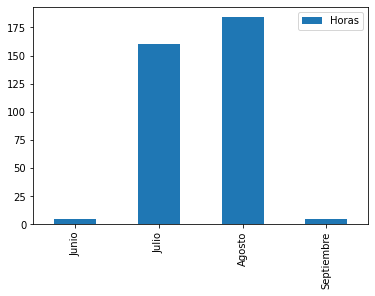

In [31]:
x_labels = horas.Meses.tolist()
plot_horas = horas.plot(kind="bar")
plot_horas.set_xticklabels(x_labels)